# This notebook is for testing Convolution and Maxpooling layer <br>

example show the simple layer structure and the result of operations <br>


In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
import matplotlib as mpl


%matplotlib inline


In [2]:
def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")

def plot_color_image(image):
    plt.imshow(image.astype(np.uint8),interpolation="nearest")
    plt.axis("off")

def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

In [3]:
from PIL import Image 
img = Image.open('./image/cat02.png')
img.load()
cat_data = np.asarray(img, dtype="int32")
cat_data.shape

(200, 200, 3)

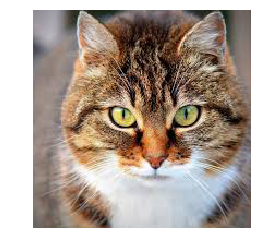

In [4]:
plot_color_image(cat_data)

In [6]:
cat_data_reshaped = np.reshape(cat_data, (1, 200, 200, 3))
cat_data_reshaped.shape

(1, 200, 200, 3)

# Pooling Layer <br>
Image Down Sizing by pooling ( select max in 2x2 cells )

(1, 100, 100, 3)


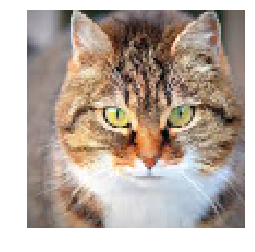

In [7]:
sample_num, height, width, channels = cat_data_reshaped.shape
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, height, width, channels), name="X")
pool_data = tf.nn.max_pool(X, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="VALID")

init = tf.global_variables_initializer()
with tf.Session() as sess:
    output = sess.run(pool_data, feed_dict={X: cat_data_reshaped})

plot_color_image(np.reshape(output, (100,100,3)))
print (output.shape)

# Convolution Layer <br>

[hyperparameter]<br>
>filter Size 7x7x2 (2-filters ) <br> 
>stride - 2(heigh & width) <br>
>zero-padding <br>

=> output-layer -> 100x100x2 <br> 

In [8]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, height, width, channels), name="X")
conv_data = tf.layers.conv2d(X, filters=2, kernel_size=7, strides=[2,2], padding="SAME")

init = tf.global_variables_initializer()
with tf.Session() as sess:
    init.run()
    output = sess.run(conv_data, feed_dict={X: cat_data_reshaped})

print (output.shape)

(1, 100, 100, 2)


> 1st filter convoluted Images ( 100 x 100 ) 

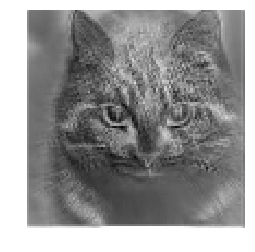

In [20]:
plot_image(output[0,:,:,0])

> 2nd filter convoluted Images ( 100 x 100 ) 

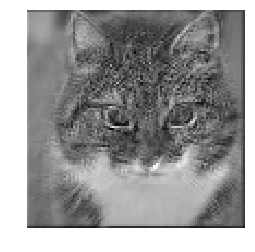

In [21]:
plot_image(output[0,:,:,1])

# Conv -> Relu -> Maxpooling <br>

In [25]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, height, width, channels), name="X")
conv_data = tf.layers.conv2d(X, filters=2, kernel_size=7, strides=[2,2], padding="SAME", activation=tf.nn.relu, name='conv')
pool_data = tf.nn.max_pool(conv_data, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="VALID")

init = tf.global_variables_initializer()
with tf.Session() as sess:
    init.run()
    output = sess.run(pool_data, feed_dict={X: cat_data_reshaped})

#plot_color_image(np.reshape(output, (100,100,3)))
print (output.shape)

(1, 50, 50, 2)


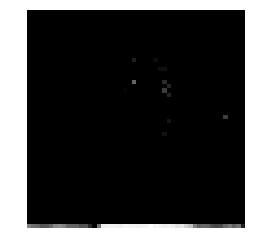

In [26]:
plot_image(output[0,:,:,0])

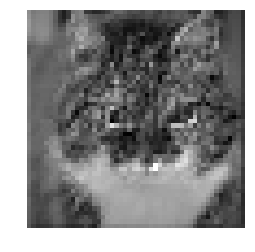

In [27]:
plot_image(output[0,:,:,1])